In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import cmath
import csv


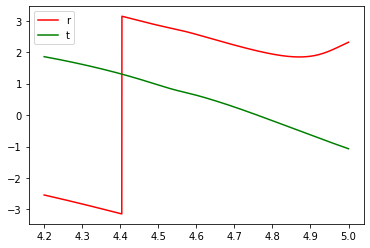

In [3]:

filename = "D:/Coupled-mode Theory/simu for fitting/0.8-1.6.txt"
with open (filename,'rt',encoding='UTF-8') as raw_data:
  data = np.loadtxt(raw_data,delimiter='\t')
xdata = data[:,0]
rdata = data[:,1] + data[:,2] * 1j
rdata = np.angle(rdata)                              # 拟合的幅值
plt.plot(xdata, rdata, 'r-', label='r')

tdata = data[:,3] + data[:,4] * 1j
tdata = np.angle(tdata)
plt.plot(xdata, tdata, 'g-', label='t')

plt.legend()
plt.show()

comb_Y = np.append(rdata, tdata)
comb_X = np.append(xdata, xdata)

In [7]:
# 定义需要拟合的函数
def func_t(x, f1re, f2re, kre, Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    t_up = (W_3*2*cmath.cos(2*yita) - (W_1)-(W_2))*Tao1
    t_down = W_2 * W_1 - (W_3)**2
    ft = t_up / t_down + 1
    return np.angle(ft)

In [4]:
def func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_1)*cmath.exp(-2j*yita) + (W_2)*cmath.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return np.angle(fr)

In [5]:
def fun_comb(x_comb, f1re, f2re, kre, Tao1Are, Tao2Are,  d, yita):
    extract1 = x_comb[:len(xdata)]
    extract2 = x_comb[len(xdata):]
    
    result1 = func_r(extract1, f1re, f2re,  kre,  Tao1Are, Tao2Are,  d, yita)
    result2 = func_t(extract2, f1re, f2re,  kre, Tao1Are, Tao2Are,  d, yita)

    return np.append(result1, result2)

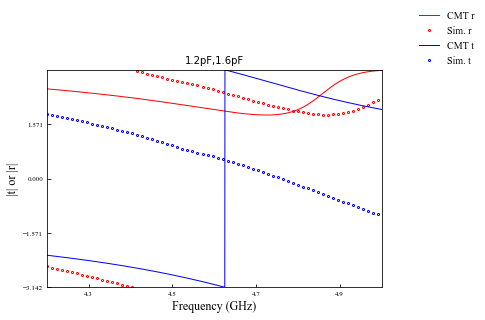

In [12]:

plt.title("1.2pF,1.6pF", size=10)

b0 = [4.3 ,4.38204441 ,-0.40055284 ,0.043, 0.0479, 1.13410579, 1.9141567]
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 10}

plt.plot(xdata, func_r(xdata, *b0), 'r-', label='CMT r', linewidth=1)
plt.plot(xdata[::30], rdata[::30], 'ro', label='Sim. r', markersize=2, markerfacecolor='none')
plt.plot(xdata, func_t(xdata, *b0), 'b-', label='CMT t', linewidth=1)
plt.plot(xdata[::30], tdata[::30], 'bo', label='Sim. t', markersize=2, markerfacecolor='none')
plt.legend(prop=font2, frameon=False, loc = (1.1,1))#设置 图例

plt.xlabel('Frequency (GHz)', fontdict=font1) # 设置 坐标名称
plt.ylabel('|t| or |r|', fontdict=font1)

plt.xlim(4.2, 5.0) #设置 坐标轴范围
plt.ylim(-np.pi, np.pi)
my_x_ticks = np.arange(4.3, 4.9, 0.2) #设置 坐标刻度间隔
my_y_ticks = np.arange(-np.pi, np.pi, np.pi/2)

plt.tick_params(axis='both',which='major',labelsize=9,direction='in',color='black') #设置刻度
plt.yticks(my_y_ticks, fontproperties = 'Times New Roman', size = 7)
plt.xticks(my_x_ticks, fontproperties = 'Times New Roman', size = 7)
# plt.grid()

plt.show()


In [68]:
# export data for Origin plotting
with open("C:/Users/mamba/Desktop/论文/fig/sim and CMT/data4origin/0.8-1.6.txt",'w') as f:
    b0 = [4.43344806 ,4.3 ,0.45120397 ,0.043, 0.0479 ,1.07894509 ,2.80569594]
    cmtt = func_t(xdata, *b0)
    cmtr = func_r(xdata, *b0)
    for i in range(0,len(xdata),25):
        f.write(str(xdata[i])+'\t'+str(rdata[i])+'\t'+str(tdata[i])+'\t'+str(cmtr[i])+'\t'+str(cmtt[i])+'\n')